<a href="https://colab.research.google.com/github/jessamcs/Week11_DeepLearning/blob/main/CNN_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist


In [ ]:
# Get data - it is already split into training and testing sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()



In [ ]:
X_train.shape


(60000, 28, 28)

In [ ]:
# Scale data between 0 and 1
X_train = X_train / 255
X_test = X_test / 255



In [ ]:
# Reshape data
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)


In [ ]:
y_train = to_categorical(y_train, num_classes = 10)
y_test = to_categorical(y_test, num_classes = 10)



In [ ]:
# Step 1: Define our network structure
# Save the input shape
input_shape = X_train.shape[1:4]
input_shape


(28, 28, 1)

In [ ]:
# Sequential model
model = Sequential()


In [ ]:
# Convolutional layer
model.add(Conv2D(filters = 8, # How many filters you want to use
                 kernel_size = 3, # size of each filter
                 activation ='relu')) # What is the shape of your input features (we defined this above)
# Pooling layer
model.add(MaxPooling2D(pool_size = 2)) # Size of pooling
# Flattening layer
model.add(Flatten())
# Output layer
model.add(Dense(10, # How many output possibilities we have
                activation = 'softmax')) # What activation function are you using?


In [ ]:
# Step 2: Compile
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['acc'])



In [ ]:
# Step 3: Fit our model
history = model.fit(X_train, y_train,
                    validation_data = (X_test, y_test), 
                    epochs=20)



Epoch 1/20
1875/1875 [==============================] - 32s 17ms/step - loss: 0.2963 - acc: 0.9159 - val_loss: 0.1399 - val_acc: 0.9576
Epoch 2/20
1875/1875 [==============================] - 18s 10ms/step - loss: 0.1230 - acc: 0.9650 - val_loss: 0.0954 - val_acc: 0.9720
Epoch 3/20
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0933 - acc: 0.9729 - val_loss: 0.0840 - val_acc: 0.9735
Epoch 4/20
1875/1875 [==============================] - 18s 9ms/step - loss: 0.0782 - acc: 0.9767 - val_loss: 0.0768 - val_acc: 0.9767
Epoch 5/20
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0687 - acc: 0.9798 - val_loss: 0.0686 - val_acc: 0.9769
Epoch 6/20
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0611 - acc: 0.9819 - val_loss: 0.0661 - val_acc: 0.9798
Epoch 7/20
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0549 - acc: 0.9831 - val_loss: 0.0699 - val_acc: 0.9771
Epoch 8/20
1875/1875 [===========================

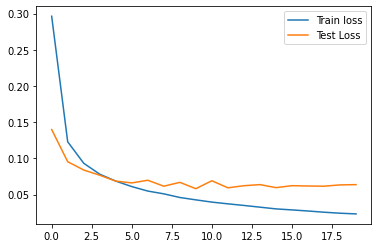

In [ ]:
# Visualize the loss
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.legend();



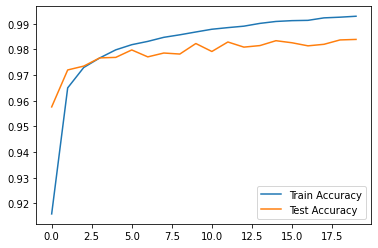

In [ ]:
# Visualize the accuracy
plt.plot(history.history['acc'], label='Train Accuracy')
plt.plot(history.history['val_acc'], label='Test Accuracy')
plt.legend();

